In [ ]:
  `
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from mlxtend.preprocessing import TransactionEncoder

from mlxtend.frequent_patterns import apriori, association_rules

import itertools
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
import pandas as pd

# Load the Excel file properly using read_excel
df = pd.read_excel("/content/Texting.xlsx")
df.head()  # Display the first few rows


,DID,ERROR LIST
0,D1,"T,LP1,LP2,SC1,SC2,SC3,ST3,ST4,SGN1,SGN2,CF1,PR..."
1,D2,"T,LP2,SC1,SC2,SC3,ST1,ST2,ST3,ST4,SGN1,SGN2,CF..."
2,D3,"T,LP1,LP2,SC1,SC3,ST1,ST2,ST4,SGN1,SGN2,CF1,PR..."
3,D4,"T,LP2,SC1,SGN1,SGN2,LC1,LC2"
4,D5,"T,LP2,SC1,SC2,SC3,ST4,SGN1,SGN2,CF1,PR1,PR2"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(44, 2)

In [ ]:
data = list(df["ERROR LIST"].apply(lambda x:x.split(',')))

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns=te.columns_).astype(int)

df

,,CF1,LC1,LC2,LP1,LP2,PR1,PR2,SC1,SC2,SC3,SGN1,SGN2,ST1,ST2,ST3,ST4,T
0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1
1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1
3,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1
4,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,1
5,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,1,1
6,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1
7,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,1,1,1
8,0,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1,1
9,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1


In [ ]:
# Find Frequency of Items
df.sum()

,0
,3
CF1,33
LC1,35
LC2,37
LP1,38
LP2,25
PR1,41
PR2,37
SC1,39
SC2,23


In [ ]:
# Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
T,1.00
SGN1,0.95
PR1,0.93
SC3,0.93
SC1,0.89
ST4,0.86
LP1,0.86
LC2,0.84
PR2,0.84
SGN2,0.82


In [ ]:
# Elimination by Support Value
first[first.Support >= 0.45]

,Support
T,1.00
SGN1,0.95
PR1,0.93
SC3,0.93
SC1,0.89
ST4,0.86
LP1,0.86
LC2,0.84
PR2,0.84
SGN2,0.82


In [ ]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
# Sample of combinations
second[:10]

[['T', 'SGN1'],
 ['T', 'PR1'],
 ['T', 'SC3'],
 ['T', 'SC1'],
 ['T', 'ST4'],
 ['T', 'LP1'],
 ['T', 'LC2'],
 ['T', 'PR2'],
 ['T', 'SGN2'],
 ['T', 'LC1']]

In [ ]:
# Finding support values
value = []
for i in range(0, len(second)):
    temp = df.T.loc[second[i]].sum()
    temp = len(temp[temp == df.T.loc[second[i]].shape[0]]) / df.shape[0]
    value.append(temp)
# Create a data frame
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(T, SGN1)",0.95,2
"(T, SC3)",0.93,2
"(T, PR1)",0.93,2
"(SGN1, SC3)",0.91,2
"(SGN1, PR1)",0.91,2
...,...,...
"(SC2, ST3)",0.27,2
"(ST1, ST3)",0.25,2
"(LP2, ST2)",0.25,2


In [ ]:
def ar_iterations(data, num_iter = 1, support_value = 0.1, iterationIndex = None):

    # Next Iterations
    def ar_calculation(iterationIndex = iterationIndex):
        # Calculation of support value
        value = []
        for i in range(0, len(iterationIndex)):
            result = data.T.loc[iterationIndex[i]].sum()
            result = len(result[result == data.T.loc[iterationIndex[i]].shape[0]]) / data.shape[0]
            value.append(result)
        # Bind results
        result = pd.DataFrame(value, columns = ["Support"])
        result["index"] = [tuple(i) for i in iterationIndex]
        result['length'] = result['index'].apply(lambda x:len(x))
        result = result.set_index("index").sort_values("Support", ascending = False)
        # Elimination by Support Value
        result = result[result.Support > support_value]
        return result

    # First Iteration
    first = pd.DataFrame(df.T.sum(axis = 1) / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
    first = first[first.Support > support_value]
    first["length"] = 1

    if num_iter == 1:
        res = first.copy()

    # Second Iteration
    elif num_iter == 2:

        second = list(itertools.combinations(first.index, 2))
        second = [list(i) for i in second]
        res = ar_calculation(second)

    # All Iterations > 2
    else:
        nth = list(itertools.combinations(set(list(itertools.chain(*iterationIndex))), num_iter))
        nth = [list(i) for i in nth]
        res = ar_calculation(nth)

    return res

In [ ]:
iteration1 = ar_iterations(df, num_iter=1, support_value=0.1)
iteration1

,Support,length
T,1.00,1
SGN1,0.95,1
PR1,0.93,1
SC3,0.93,1
SC1,0.89,1
ST4,0.86,1
LP1,0.86,1
LC2,0.84,1
PR2,0.84,1
SGN2,0.82,1


In [ ]:
iteration2 = ar_iterations(df, num_iter=2, support_value=0.1)
iteration2

,Support,length
index,,
"(T, SGN1)",0.95,2
"(T, SC3)",0.93,2
"(T, PR1)",0.93,2
"(SGN1, PR1)",0.91,2
"(SGN1, SC3)",0.91,2
...,...,...
"(SC2, ST3)",0.27,2
"(LP2, ST2)",0.25,2
"(ST1, ST3)",0.25,2


In [ ]:
iteration3 = ar_iterations(df, num_iter=3, support_value=0.01,
              iterationIndex=iteration2.index)
iteration3

,Support,length
index,,
"(T, SGN1, PR1)",0.91,3
"(T, SC3, SGN1)",0.91,3
"(T, SC3, PR1)",0.89,3
"(SC3, SGN1, PR1)",0.89,3
"(T, SC3, SC1)",0.86,3
...,...,...
"(LP2, SC1, ST3)",0.16,3
"(LP2, SC2, ST3)",0.16,3
"(LP2, ST1, ST3)",0.14,3


In [ ]:
iteration4 = ar_iterations(df, num_iter=4, support_value=0.01,
              iterationIndex=iteration3.index)
iteration4

,Support,length
index,,
"(T, SC3, SGN1, PR1)",0.89,4
"(T, SC3, PR2, SGN1)",0.84,4
"(T, SC3, SGN1, SC1)",0.84,4
"(T, SGN1, SC1, PR1)",0.82,4
"(T, SC3, PR2, PR1)",0.82,4
...,...,...
"(LP2, ST1, ST2, ST3)",0.09,4
"(LP2, PR2, ST2, ST3)",0.09,4
"(LP2, SC3, ST2, ST3)",0.09,4


In [ ]:
# Apriori
freq_items = apriori(df, min_support = 0.1, use_colnames = True, verbose = 1)
freq_items.sort_values("support", ascending = False)

Processing 16 combinations | Sampling itemset size 16


,support,itemsets
16,1.00,(T)
10,0.95,(SGN1)
137,0.95,"(SGN1, T)"
131,0.93,"(SC3, T)"
5,0.93,(PR1)
...,...,...
84849,0.11,"(LP2, SC2, LC2, PR2, LP1, SGN1, CF1, SC1, ST3,..."
84852,0.11,"(SGN2, LP2, SC2, ST1, LC2, PR2, LP1, CF1, SC1,..."
84857,0.11,"(LP2, SC2, LC2, PR2, LP1, CF1, SC1, ST3, ST4, ..."
84858,0.11,"(LP2, SC2, T, LC2, PR2, LP1, CF1, SC1, ST3, PR1)"


In [ ]:
freq_items.sort_values("support", ascending = False).head(11)

,support,itemsets
16,1.00,(T)
10,0.95,(SGN1)
137,0.95,"(SGN1, T)"
131,0.93,"(SC3, T)"
5,0.93,(PR1)
97,0.93,"(T, PR1)"
9,0.93,(SC3)
125,0.91,"(SC3, SGN1)"
651,0.91,"(SGN1, T, PR1)"
781,0.91,"(SC3, SGN1, T)"


In [ ]:
freq_items.sort_values("support", ascending = False).tail(5)

,support,itemsets
84849,0.11,"(LP2, SC2, LC2, PR2, LP1, SGN1, CF1, SC1, ST3,..."
84852,0.11,"(SGN2, LP2, SC2, ST1, LC2, PR2, LP1, CF1, SC1,..."
84857,0.11,"(LP2, SC2, LC2, PR2, LP1, CF1, SC1, ST3, ST4, ..."
84858,0.11,"(LP2, SC2, T, LC2, PR2, LP1, CF1, SC1, ST3, PR1)"
104574,0.11,"(SGN2, SC2, ST1, T, LC2, SC3, PR2, LP1, SGN1, ..."


In [ ]:
df_ar[(df_ar.support > 0.15) & (df_ar.confidence > 0.5)].sort_values("confidence", ascending = False)

In [ ]:
# Association Rules & Info
df_ar = association_rules(freq_items, metric = "confidence", min_threshold = 0.8)
df_ar

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
file_path = '/content/Texting.xlsx'
excel_data = pd.read_excel(file_path)

# Step 1: Split 'ERROR LIST' into individual items and create a one-hot encoded format
transactions = excel_data['ERROR LIST'].str.get_dummies(sep=',')

# Step 2: Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(transactions, min_support=0.3, use_colnames=True)

# Step 3: Generate strong association rules based on confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Step 4: Display only the strong association rules (antecedents, consequents, and relevant metrics)
strong_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
print("Strong Association Rules:\n", strong_rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Strong Association Rules:
         antecedents                                        consequents  \
0             (LC1)                                              (CF1)   
1             (CF1)                                              (LC1)   
2             (LC2)                                              (CF1)   
3             (CF1)                                              (LC2)   
4             (LP1)                                              (CF1)   
...             ...                                                ...   
1580408    (T, ST2)  (PR1, LC2, ST1, PR2, SC3, SGN1, LC1, SC1, LP1,...   
1580409  (ST2, SC1)  (PR1, LC2, ST1, PR2, SC3, SGN1, LC1, T, LP1, ST4)   
1580410  (LP1, ST2)  (PR1, LC2, ST1, PR2, SC3, SGN1, LC1, T, SC1, ST4)   
1580411  (ST2, ST4)  (PR1, LC2, ST1, PR2, SC3, SGN1, LC1, T, SC1, LP1)   
1580412       (ST2)  (PR1, LC2, ST1, PR2, SC3, SGN1, LC1, T, SC1, L...   

          support  confidence      lift  
0        0.613636    0.771429  1.028571  


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
file_path = '/content/Texting.xlsx'
excel_data = pd.read_excel(file_path)

# Step 1: Split 'ERROR LIST' into individual items and create a one-hot encoded format
transactions = excel_data['ERROR LIST'].str.get_dummies(sep=',')

# Step 2: Generate the C1 (Candidate 1-itemsets) using apriori with very low support
# This will also help us find the L1 frequent 1-itemsets by filtering on minimum support
frequent_itemsets_C1 = apriori(transactions, min_support=0.001, use_colnames=True)

# Step 3: Generate L1 (frequent 1-itemsets) by filtering C1 with a higher minimum support (e.g., 30%)
frequent_itemsets_L1 = frequent_itemsets_C1[frequent_itemsets_C1['support'] >= 0.3]

# Step 4: Generate higher-level frequent itemsets (L2, L3, ...) from L1
# Using apriori again with minimum support threshold
frequent_itemsets = apriori(transactions, min_support=0.3, use_colnames=True)

# Step 5: Generate strong association rules based on confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Step 6: Sort the rules by confidence and limit to the top 10
top_10_rules = rules.sort_values(by='confidence', ascending=False).head(10)

# Step 7: Display only the top 10 strong association rules (antecedents, consequents, and metrics)
strong_rules = top_10_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
print("Top 10 Strong Association Rules:\n", strong_rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top 10 Strong Association Rules:
                                    antecedents            consequents  \
133524                   (LC1, ST2, PR2, SGN2)            (SGN1, LC2)   
1002662    (PR1, ST1, LC2, CF1, LP1, SC2, ST4)               (T, SC3)   
583653          (PR1, LC2, SC3, CF1, LP1, SC2)            (SC1, SGN1)   
1546270   (ST2, ST1, LC2, SGN1, LC1, LP1, ST4)     (T, PR2, SC1, PR1)   
1002658      (PR1, ST1, LC2, T, CF1, LP1, SC2)             (SC3, ST4)   
1208112     (PR1, ST1, LC2, PR2, T, SGN2, LP1)            (SC3, SGN1)   
470763                         (LP1, SC3, SC2)  (SC1, SGN1, PR1, ST4)   
1208111  (PR1, ST1, LC2, PR2, SGN1, SGN2, LP1)               (T, SC3)   
470766                        (SC2, LP1, SGN1)   (SC1, SC3, PR1, ST4)   
1546268   (ST2, ST1, LC2, SGN1, LC1, SC1, LP1)     (T, PR2, PR1, ST4)   

          support  confidence      lift  
133524   0.318182         1.0  1.222222  
1002662  0.318182         1.0  1.073171  
583653   0.431818         1.0  1.157

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
file_path = '/content/Conversations.xlsx'
excel_data = pd.read_excel(file_path)

# Step 1: Split 'ERROR LIST' into individual items and create a one-hot encoded format
transactions = excel_data['ERROR LIST'].str.get_dummies(sep=',')

# Step 2: Generate the C1 (Candidate 1-itemsets) using apriori with very low support
frequent_itemsets_C1 = apriori(transactions, min_support=0.001, use_colnames=True)

# Step 3: Generate L1 (frequent 1-itemsets) by filtering C1 with a higher minimum support (e.g., 30%)
frequent_itemsets_L1 = frequent_itemsets_C1[frequent_itemsets_C1['support'] >= 0.3]

# Step 4: Generate higher-level frequent itemsets (L2, L3, ...) from L1
frequent_itemsets = apriori(transactions, min_support=0.3, use_colnames=True)

# Step 5: Generate strong association rules based on confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Step 6: Filter the rules to include only those where the antecedent is exactly 'C'
rules_with_C_only = rules[rules['antecedents'].apply(lambda x: x == frozenset({'C'}))]

# Step 7: Sort the rules by confidence and limit to the top 10
top_10_rules_with_C_only = rules_with_C_only.sort_values(by='confidence', ascending=False).head(10)

# Step 8: Display only the antecedents ('C') and their frequent consequents
strong_rules_with_C_only = top_10_rules_with_C_only[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
print("Top 10 Strong Association Rules where antecedent is exactly 'C':\n", strong_rules_with_C_only)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top 10 Strong Association Rules where antecedent is exactly 'C':
      antecedents      consequents   support  confidence  lift
29           (C)            (PR1)  0.909091    0.909091   1.0
36           (C)            (SC3)  0.909091    0.909091   1.0
32           (C)            (SC1)  0.886364    0.886364   1.0
37           (C)           (SGN1)  0.886364    0.886364   1.0
640          (C)       (SC3, PR1)  0.863636    0.863636   1.0
630          (C)       (PR1, SC1)  0.863636    0.863636   1.0
0            (C)           ( LP1)  0.818182    0.818182   1.0
5005         (C)  (SC3, PR1, SC1)  0.818182    0.818182   1.0
645          (C)      (SGN1, PR1)  0.818182    0.818182   1.0
707          (C)       (SC3, SC1)  0.818182    0.818182   1.0


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth

# Load the dataset
file_path = '/content/Texting.xlsx'
excel_data = pd.read_excel(file_path)

# Step 1: Split 'ERROR LIST' into individual items and create a one-hot encoded format
transactions = excel_data['ERROR LIST'].str.get_dummies(sep=',')

# Step 2: Use FP-Growth to find frequent itemsets
# Set minimum support (e.g., 30%)
min_support = 0.3
frequent_itemsets_fp = fpgrowth(transactions, min_support=min_support, use_colnames=True)

# Step 3: Display the frequent itemsets
print("Frequent Itemsets using FP-Growth:\n", frequent_itemsets_fp)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets using FP-Growth:
         support                 itemsets
0      1.000000                      (T)
1      0.954545                   (SGN1)
2      0.931818                    (PR1)
3      0.931818                    (SC3)
4      0.886364                    (SC1)
...         ...                      ...
18450  0.431818          (ST2, LP1, LC2)
18451  0.431818       (T, ST4, ST2, LP1)
18452  0.431818       (T, ST2, LP1, LC2)
18453  0.431818     (ST4, ST2, LP1, LC2)
18454  0.431818  (ST2, LC2, LP1, T, ST4)

[18455 rows x 2 columns]


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth

# Load the dataset
file_path = '/content/Conversations.xlsx'
excel_data = pd.read_excel(file_path)

# Step 1: Split 'ERROR LIST' into individual items and create a one-hot encoded format
transactions = excel_data['ERROR LIST'].str.get_dummies(sep=',')

# Step 2: Use FP-Growth to find frequent itemsets
# Set minimum support (e.g., 30%)
min_support = 0.3
frequent_itemsets_fp = fpgrowth(transactions, min_support=min_support, use_colnames=True)

# Step 3: Get the first 10 frequent itemsets
top_10_frequent_itemsets = frequent_itemsets_fp.head(11)

# Step 4: Display the first 10 frequent itemsets
print("Top 10 Frequent Itemsets using FP-Growth:\n", top_10_frequent_itemsets)


Top 10 Frequent Itemsets using FP-Growth:
      support itemsets
0   1.000000      (C)
1   0.909091    (PR1)
2   0.886364   (SGN1)
3   0.886364    (SC1)
4   0.818182    (ST4)
5   0.818182   (SGN2)
6   0.750000    (LC2)
7   0.681818    (PR2)
8   0.590909    (CF1)
9   0.568182    (LC1)
10  0.909091    (SC3)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


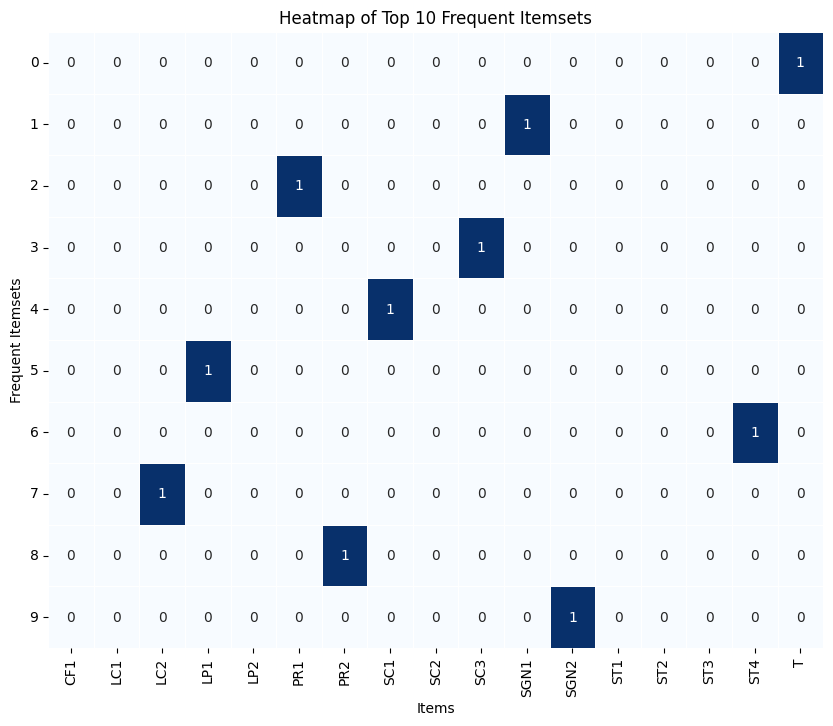

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import fpgrowth

# Load the dataset
file_path = '/content/Texting.xlsx'
excel_data = pd.read_excel(file_path)

# Step 1: Split 'ERROR LIST' into individual items and create a one-hot encoded format
transactions = excel_data['ERROR LIST'].str.get_dummies(sep=',')

# Step 2: Use FP-Growth to find frequent itemsets
# Set minimum support (e.g., 30%)
min_support = 0.3
frequent_itemsets_fp = fpgrowth(transactions, min_support=min_support, use_colnames=True)

# Step 3: Get the first 10 frequent itemsets
top_10_frequent_itemsets = frequent_itemsets_fp.head(10)

# Step 4: Create a matrix for visualization
# Expand the frequent itemsets to create a binary matrix representation
itemset_matrix = top_10_frequent_itemsets['itemsets'].apply(lambda x: pd.Series([1 if item in x else 0 for item in transactions.columns], index=transactions.columns))

# Step 5: Plot using Seaborn Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(itemset_matrix, annot=True, cmap="Blues", cbar=False, linewidths=0.5)
plt.title("Heatmap of Top 10 Frequent Itemsets")
plt.xlabel("Items")
plt.ylabel("Frequent Itemsets")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


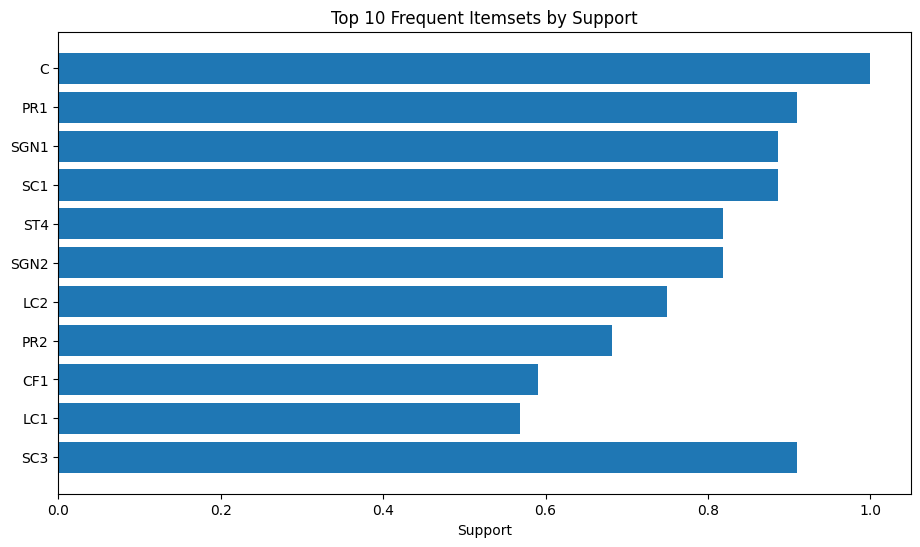

In [ ]:
import matplotlib.pyplot as plt

# Visualize the top 10 frequent itemsets
plt.figure(figsize=(11, 6))
plt.barh(range(len(top_10_frequent_itemsets)), top_10_frequent_itemsets['support'], align='center')
plt.yticks(range(len(top_10_frequent_itemsets)), top_10_frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x))))
plt.xlabel('Support')
plt.title('Top 10 Frequent Itemsets by Support')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest itemset on top
plt.show()


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth

# Load the dataset
file_path = '/content/Conversations.xlsx'
excel_data = pd.read_excel(file_path)

# Step 1: Split 'ERROR LIST' into individual items and create a one-hot encoded format
transactions = excel_data['ERROR LIST'].str.get_dummies(sep=',')

# Step 2: Use FP-Growth to find frequent itemsets
# Set minimum support (e.g., 30%)
min_support = 0.3
frequent_itemsets_fp = fpgrowth(transactions, min_support=min_support, use_colnames=True)

# Step 3: Get the top 10 frequent itemsets based on support value
top_10_frequent_itemsets = frequent_itemsets_fp.nlargest(11, 'support')

# Step 4: Display the top 10 frequent itemsets
print("Top 10 Frequent Itemsets using FP-Growth based on support:\n", top_10_frequent_itemsets)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top 10 Frequent Itemsets using FP-Growth based on support:
        support       itemsets
0     1.000000            (C)
1     0.909091          (PR1)
10    0.909091          (SC3)
16    0.909091       (C, PR1)
2683  0.909091       (SC3, C)
2     0.886364         (SGN1)
3     0.886364          (SC1)
19    0.886364      (C, SGN1)
26    0.886364       (C, SC1)
17    0.863636     (SC3, PR1)
18    0.863636  (SC3, C, PR1)


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth
import time

# Load the dataset
file_path = '/content/Texting.xlsx'
excel_data = pd.read_excel(file_path)

# Step 1: Split 'ERROR LIST' into individual items and create a one-hot encoded format
transactions = excel_data['ERROR LIST'].str.get_dummies(sep=',')

# Set minimum support for both algorithms
min_support = 0.3

# Measure runtime for Apriori algorithm
start_time_apriori = time.time()
frequent_itemsets_apriori = apriori(transactions, min_support=min_support, use_colnames=True)
end_time_apriori = time.time()
runtime_apriori = end_time_apriori - start_time_apriori

# Measure runtime for FP-Growth algorithm
start_time_fp_growth = time.time()
frequent_itemsets_fp = fpgrowth(transactions, min_support=min_support, use_colnames=True)
end_time_fp_growth = time.time()
runtime_fp_growth = end_time_fp_growth - start_time_fp_growth

# Get the top 10 frequent itemsets based on support for Apriori
top_10_apriori = frequent_itemsets_apriori.nlargest(10, 'support')

# Get the top 10 frequent itemsets based on support for FP-Growth
top_10_fp_growth = frequent_itemsets_fp.nlargest(10, 'support')

# Print the results
print("Top 10 Frequent Itemsets using Apriori:\n", top_10_apriori)
print("Runtime of Apriori algorithm: {:.6f} seconds".format(runtime_apriori))

print("\nTop 10 Frequent Itemsets using FP-Growth:\n", top_10_fp_growth)
print("Runtime of FP-Growth algorithm: {:.6f} seconds".format(runtime_fp_growth))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top 10 Frequent Itemsets using Apriori:
       support        itemsets
16   1.000000             (T)
10   0.954545          (SGN1)
132  0.954545       (T, SGN1)
5    0.931818           (PR1)
9    0.931818           (SC3)
94   0.931818        (T, PR1)
126  0.931818        (T, SC3)
88   0.909091     (SGN1, PR1)
120  0.909091     (SC3, SGN1)
568  0.909091  (T, SGN1, PR1)
Runtime of Apriori algorithm: 1.000269 seconds

Top 10 Frequent Itemsets using FP-Growth:
      support        itemsets
0   1.000000             (T)
1   0.954545          (SGN1)
17  0.954545       (T, SGN1)
2   0.931818           (PR1)
3   0.931818           (SC3)
18  0.931818        (T, PR1)
21  0.931818        (T, SC3)
19  0.909091     (SGN1, PR1)
20  0.909091  (T, SGN1, PR1)
22  0.909091     (SC3, SGN1)
Runtime of FP-Growth algorithm: 0.471503 seconds


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth

# Load the dataset
file_path = '/content/Texting.xlsx'  # Change to the appropriate file path if necessary
excel_data = pd.read_excel(file_path)

# Step 1: Check for missing values and split 'ERROR LIST' into individual items, create a one-hot encoded format
if excel_data['ERROR LIST'].isnull().sum() > 0:
    print("Warning: There are missing values in the 'ERROR LIST' column. These will be filled with empty strings.")
    excel_data['ERROR LIST'] = excel_data['ERROR LIST'].fillna('')

transactions = excel_data['ERROR LIST'].str.get_dummies(sep=',')

# Step 2: Use FP-Growth to find frequent itemsets
# Set minimum support (e.g., 30%)
min_support = 0.3
frequent_itemsets_fp = fpgrowth(transactions, min_support=min_support, use_colnames=True)

# Step 3: Get the top 10 frequent itemsets based on support value
top_10_frequent_itemsets = frequent_itemsets_fp.nlargest(10, 'support')

# Step 4: Display the top 10 frequent itemsets
print("Top 10 Frequent Itemsets using FP-Growth based on support:\n", top_10_frequent_itemsets)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top 10 Frequent Itemsets using FP-Growth based on support:
      support        itemsets
0   1.000000             (T)
1   0.954545          (SGN1)
17  0.954545       (T, SGN1)
2   0.931818           (PR1)
3   0.931818           (SC3)
18  0.931818        (T, PR1)
21  0.931818        (T, SC3)
19  0.909091     (PR1, SGN1)
20  0.909091  (T, PR1, SGN1)
22  0.909091     (SC3, SGN1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


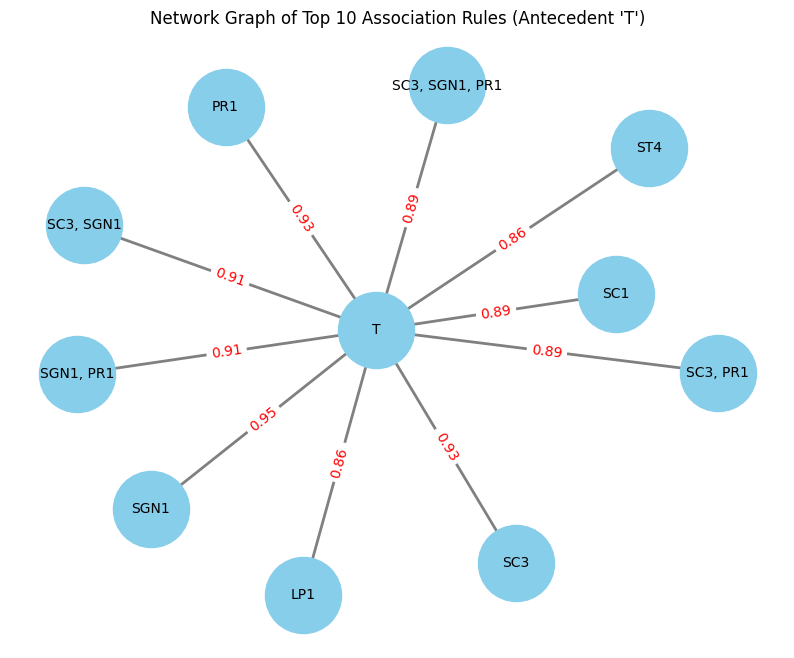

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Data extracted from the image (manually entered)
rules_data = [
    {"antecedent": "T", "consequent": "SGN1", "support": 0.954545, "confidence": 0.954545, "lift": 1.0},
    {"antecedent": "T", "consequent": "PR1", "support": 0.931818, "confidence": 0.931818, "lift": 1.0},
    {"antecedent": "T", "consequent": "SC3", "support": 0.931818, "confidence": 0.931818, "lift": 1.0},
    {"antecedent": "T", "consequent": "SC3, SGN1", "support": 0.909091, "confidence": 0.909091, "lift": 1.0},
    {"antecedent": "T", "consequent": "SGN1, PR1", "support": 0.909091, "confidence": 0.909091, "lift": 1.0},
    {"antecedent": "T", "consequent": "SC3, PR1", "support": 0.886364, "confidence": 0.886364, "lift": 1.0},
    {"antecedent": "T", "consequent": "SC1", "support": 0.886364, "confidence": 0.886364, "lift": 1.0},
    {"antecedent": "T", "consequent": "SC3, SGN1, PR1", "support": 0.886364, "confidence": 0.886364, "lift": 1.0},
    {"antecedent": "T", "consequent": "LP1", "support": 0.863636, "confidence": 0.863636, "lift": 1.0},
    {"antecedent": "T", "consequent": "ST4", "support": 0.863636, "confidence": 0.863636, "lift": 1.0},
]

# Create a network graph
G = nx.DiGraph()

# Add nodes and edges from the rules data
for rule in rules_data:
    antecedent = rule['antecedent']
    consequent = rule['consequent']
    confidence = rule['confidence']

    # Add nodes (antecedent and consequent)
    G.add_node(antecedent, label=antecedent)
    G.add_node(consequent, label=consequent)

    # Add edges (rules) with confidence as edge weight
    G.add_edge(antecedent, consequent, weight=confidence)

# Position nodes using a spring layout
pos = nx.spring_layout(G)

# Plotting the graph
plt.figure(figsize=(10, 8))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue')

# Draw edges with arrow style
nx.draw_networkx_edges(G, pos, width=2, arrowstyle='->', arrowsize=20, edge_color='gray')

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edge labels (confidence values)
edge_labels = { (u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Network Graph of Top 10 Association Rules (Antecedent 'T')")
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


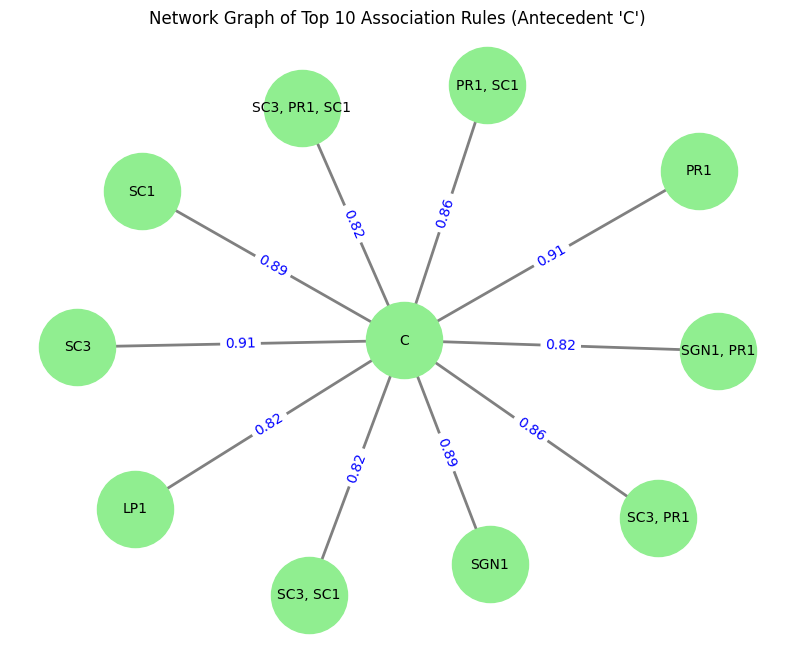

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Data extracted from the image (manually entered)
rules_data = [
    {"antecedent": "C", "consequent": "PR1", "support": 0.909091, "confidence": 0.909091, "lift": 1.0},
    {"antecedent": "C", "consequent": "SC3", "support": 0.909091, "confidence": 0.909091, "lift": 1.0},
    {"antecedent": "C", "consequent": "SC1", "support": 0.886364, "confidence": 0.886364, "lift": 1.0},
    {"antecedent": "C", "consequent": "SGN1", "support": 0.886364, "confidence": 0.886364, "lift": 1.0},
    {"antecedent": "C", "consequent": "SC3, PR1", "support": 0.863636, "confidence": 0.863636, "lift": 1.0},
    {"antecedent": "C", "consequent": "PR1, SC1", "support": 0.863636, "confidence": 0.863636, "lift": 1.0},
    {"antecedent": "C", "consequent": "LP1", "support": 0.818182, "confidence": 0.818182, "lift": 1.0},
    {"antecedent": "C", "consequent": "SC3, PR1, SC1", "support": 0.818182, "confidence": 0.818182, "lift": 1.0},
    {"antecedent": "C", "consequent": "SGN1, PR1", "support": 0.818182, "confidence": 0.818182, "lift": 1.0},
    {"antecedent": "C", "consequent": "SC3, SC1", "support": 0.818182, "confidence": 0.818182, "lift": 1.0},
]

# Create a network graph
G = nx.DiGraph()

# Add nodes and edges from the rules data
for rule in rules_data:
    antecedent = rule['antecedent']
    consequent = rule['consequent']
    confidence = rule['confidence']

    # Add nodes (antecedent and consequent)
    G.add_node(antecedent, label=antecedent)
    G.add_node(consequent, label=consequent)

    # Add edges (rules) with confidence as edge weight
    G.add_edge(antecedent, consequent, weight=confidence)

# Position nodes using a spring layout
pos = nx.spring_layout(G)

# Plotting the graph
plt.figure(figsize=(10, 8))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightgreen')

# Draw edges with arrow style
nx.draw_networkx_edges(G, pos, width=2, arrowstyle='->', arrowsize=20, edge_color='gray')

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edge labels (confidence values)
edge_labels = { (u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue')

plt.title("Network Graph of Top 10 Association Rules (Antecedent 'C')")
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


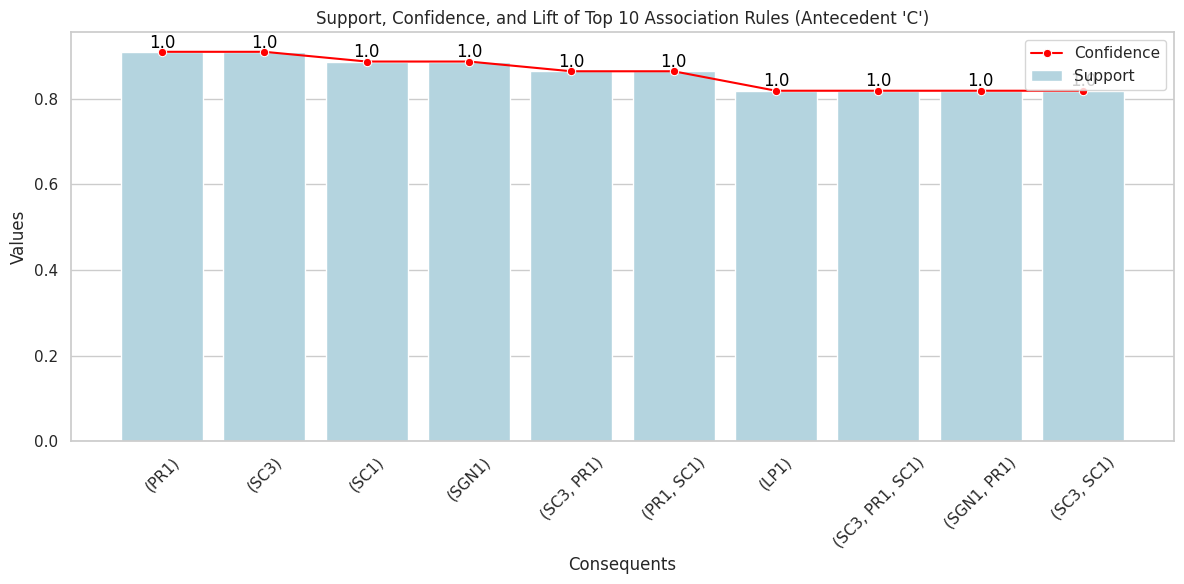

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the image (Top 10 association rules)
rules_data = {
    'antecedents': ['(C)', '(C)', '(C)', '(C)', '(C)', '(C)', '(C)', '(C)', '(C)', '(C)'],
    'consequents': ['(PR1)', '(SC3)', '(SC1)', '(SGN1)', '(SC3, PR1)', '(PR1, SC1)', '(LP1)', '(SC3, PR1, SC1)', '(SGN1, PR1)', '(SC3, SC1)'],
    'support': [0.909091, 0.909091, 0.886364, 0.886364, 0.863636, 0.863636, 0.818182, 0.818182, 0.818182, 0.818182],
    'confidence': [0.909091, 0.909091, 0.886364, 0.886364, 0.863636, 0.863636, 0.818182, 0.818182, 0.818182, 0.818182],
    'lift': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
}

# Convert to DataFrame
df = pd.DataFrame(rules_data)

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot Support
sns.barplot(x='consequents', y='support', data=df, color='lightblue', label='Support')

# Plot Confidence as a line
sns.lineplot(x='consequents', y='confidence', data=df, color='red', marker='o', label='Confidence')

# Add lift values on top of bars
for index, row in df.iterrows():
    plt.text(index, row['support'] + 0.01, f"{row['lift']:.1f}", color='black', ha="center")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.xlabel("Consequents")
plt.ylabel("Values")
plt.title("Support, Confidence, and Lift of Top 10 Association Rules (Antecedent 'C')")
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


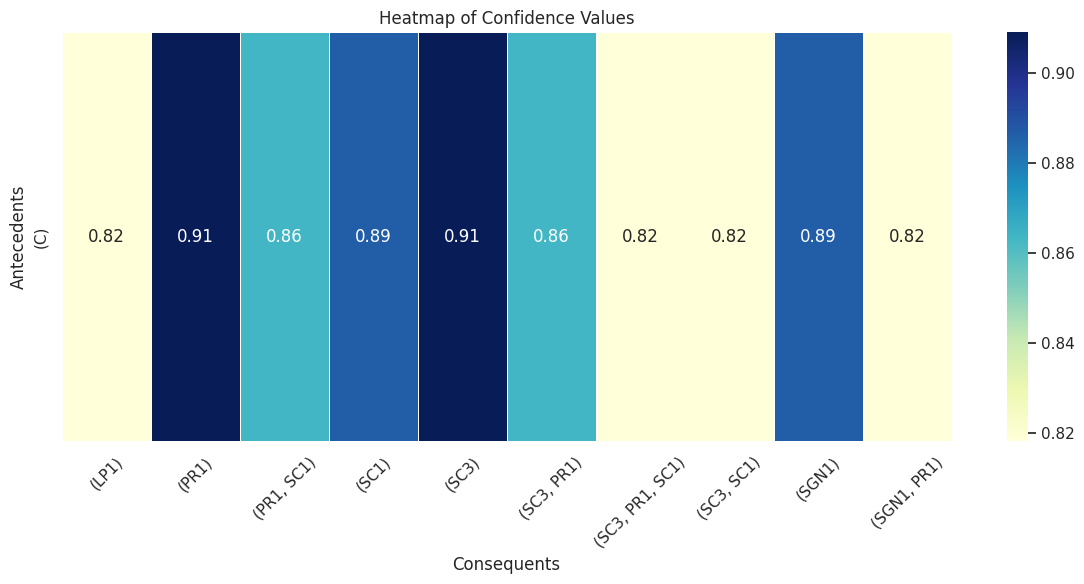

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data from the input
rules_data = {
    'antecedents': ['(C)', '(C)', '(C)', '(C)', '(C)', '(C)', '(C)', '(C)', '(C)', '(C)'],
    'consequents': ['(PR1)', '(SC3)', '(SC1)', '(SGN1)', '(SC3, PR1)', '(PR1, SC1)', '(LP1)', '(SC3, PR1, SC1)', '(SGN1, PR1)', '(SC3, SC1)'],
    'support': [0.909091, 0.909091, 0.886364, 0.886364, 0.863636, 0.863636, 0.818182, 0.818182, 0.818182, 0.818182],
    'confidence': [0.909091, 0.909091, 0.886364, 0.886364, 0.863636, 0.863636, 0.818182, 0.818182, 0.818182, 0.818182],
    'lift': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
}

# Create DataFrame
df = pd.DataFrame(rules_data)

# Pivot the DataFrame to prepare for heatmap (set index as antecedents and columns as consequents)
heatmap_data = df.pivot(index="antecedents", columns="consequents", values="confidence")

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=0.5)

plt.title("Heatmap of Confidence Values")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


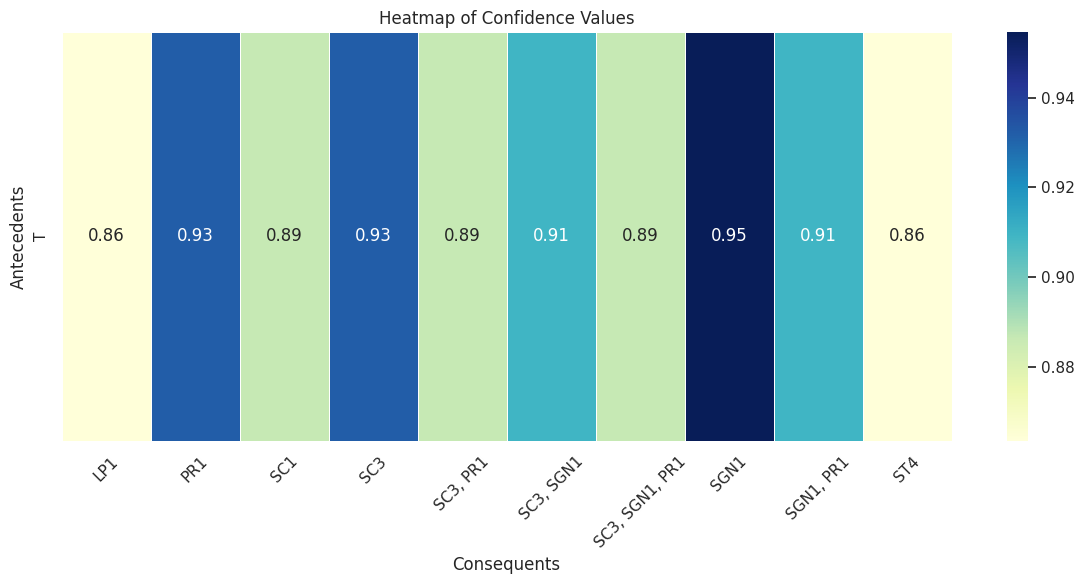

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# New data from the input
rules_data = [
    {"antecedent": "T", "consequent": "SGN1", "support": 0.954545, "confidence": 0.954545, "lift": 1.0},
    {"antecedent": "T", "consequent": "PR1", "support": 0.931818, "confidence": 0.931818, "lift": 1.0},
    {"antecedent": "T", "consequent": "SC3", "support": 0.931818, "confidence": 0.931818, "lift": 1.0},
    {"antecedent": "T", "consequent": "SC3, SGN1", "support": 0.909091, "confidence": 0.909091, "lift": 1.0},
    {"antecedent": "T", "consequent": "SGN1, PR1", "support": 0.909091, "confidence": 0.909091, "lift": 1.0},
    {"antecedent": "T", "consequent": "SC3, PR1", "support": 0.886364, "confidence": 0.886364, "lift": 1.0},
    {"antecedent": "T", "consequent": "SC1", "support": 0.886364, "confidence": 0.886364, "lift": 1.0},
    {"antecedent": "T", "consequent": "SC3, SGN1, PR1", "support": 0.886364, "confidence": 0.886364, "lift": 1.0},
    {"antecedent": "T", "consequent": "LP1", "support": 0.863636, "confidence": 0.863636, "lift": 1.0},
    {"antecedent": "T", "consequent": "ST4", "support": 0.863636, "confidence": 0.863636, "lift": 1.0},
]

# Create DataFrame from the new rules data
df = pd.DataFrame(rules_data)

# Pivot the DataFrame to prepare for heatmap (set index as antecedents and columns as consequents)
heatmap_data = df.pivot(index="antecedent", columns="consequent", values="confidence")

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=0.5)

plt.title("Heatmap of Confidence Values")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Define the rules data
rules_data = [
    {"antecedent": "C", "consequent": "PR1", "support": 0.909091, "confidence": 0.909091, "lift": 1.0},
    {"antecedent": "C", "consequent": "SC3", "support": 0.909091, "confidence": 0.909091, "lift": 1.0},
    {"antecedent": "C", "consequent": "SC1", "support": 0.886364, "confidence": 0.886364, "lift": 1.0},
    {"antecedent": "C", "consequent": "SGN1", "support": 0.886364, "confidence": 0.886364, "lift": 1.0},
    {"antecedent": "C", "consequent": "SC3, PR1", "support": 0.863636, "confidence": 0.863636, "lift": 1.0},
    {"antecedent": "C", "consequent": "PR1, SC1", "support": 0.863636, "confidence": 0.863636, "lift": 1.0},
    {"antecedent": "C", "consequent": "LP1", "support": 0.818182, "confidence": 0.818182, "lift": 1.0},
    {"antecedent": "C", "consequent": "SC3, PR1, SC1", "support": 0.818182, "confidence": 0.818182, "lift": 1.0},
    {"antecedent": "C", "consequent": "SGN1, PR1", "support": 0.818182, "confidence": 0.818182, "lift": 1.0},
    {"antecedent": "C", "consequent": "SC3, SC1", "support": 0.818182, "confidence": 0.818182, "lift": 1.0},
]

# Extract unique antecedents and consequents
unique_items = list(set(item['antecedent'] for item in rules_data) | set(item['consequent'] for item in rules_data))
num_items = len(unique_items)

# Create a mapping from item names to indices
item_index = {item: index for index, item in enumerate(unique_items)}

# Prepare the source and target lists for the links
sources = []
targets = []
values = []

for rule in rules_data:
    source = item_index[rule["antecedent"]]
    target = item_index[rule["consequent"]]
    sources.append(source)
    targets.append(target)
    values.append(rule["support"])  # You can use support, confidence, or lift here

# Create the Chord Diagram
fig = go.Figure(data=go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=unique_items,
        color="blue"
    ),
    link=dict(
        source=sources,  # indices correspond to labels
        target=targets,  # indices correspond to labels
        value=values     # values of the links
    )
))

fig.update_layout(title_text="Association Rules Chord Diagram", font_size=10)
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

